In [ ]:
import geopandas as gpd
import pandas as pd
from gerrychain import Graph

#from gerrychain import Graph, Partition, Election
#from gerrychain.updaters import Tally, cut_edges


# vtd['vote_difference'] = vtd.EL16G_GV_R - vtd.EL16G_GV_D
# vtd.plot("vote_difference", legend = True, figsize = (20,20) )
# vtd_county.plot("EL12G_GV_R", legend = True, figsize = (10,10) )
#vtd_county = vtd.dissolve(by='County', aggfunc='sum')
#vtd_county.to_file("./data/NC_county_merged.json", driver="GeoJSON")  

In [ ]:
vtd = gpd.read_file("./data/NC_VTD.shp").to_crs("EPSG:4269")
bg = gpd.read_file("./data/tl_2016_37_bg.shp").to_crs("EPSG:4269")
blocks = gpd.read_file("./data/blocks/tl_2016_37_tabblock10.shp").to_crs("EPSG:4269")

In [ ]:
#joined_within = gpd.sjoin(blocks, vtd, how = 'left', predicate = 'within' )
#joined_within[["GEOID10", "VTD"]].groupby("GEOID10").agg('count').value_counts()

i = 0 # only change to 1 to experiment with block groups;
geo_table = [ blocks, bg][i]
geo_id = ["GEOID10", "GEOID"][i]

joined = gpd.sjoin(geo_table, vtd, how = 'left',  predicate = 'intersects' )
mapping = joined[[geo_id, "VTD"]]

## Properties of VTDs

Some questions: 

What are the general populations for VTDs?

<AxesSubplot: title={'center': 'Histogram of VTD populations in NC 2016'}, ylabel='Frequency'>

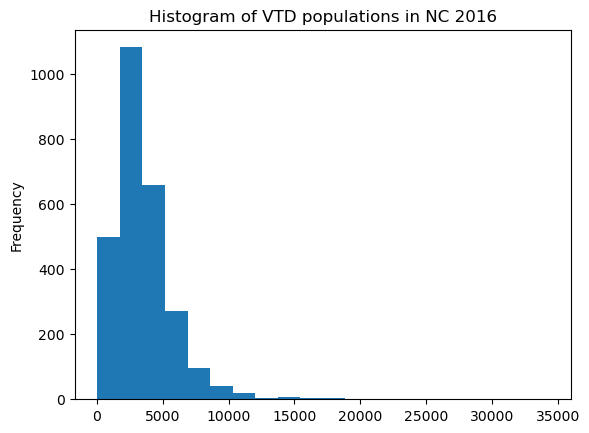

In [38]:
vtd.TOTPOP.plot(kind = 'hist', bins = 20, title = "Histogram of VTD populations in NC 2016")

In [108]:
vtd.TOTPOP.describe()

count     2692.000000
mean      3542.155646
std       2459.640116
min         37.000000
25%       2047.750000
50%       3106.000000
75%       4433.000000
max      34282.000000
Name: TOTPOP, dtype: float64

How many VTDs?

In [133]:
len(vtd)

2692

So, loosely speaking, we are looking for VTDs of total pop 2000-5000 , and about 2500 of them.

Also, in terms of the number of blocks that tend to intersect (or make up) VTDs:

In [46]:
joined[["GEOID10", "VTD"]].groupby("VTD").agg('count').describe()

,GEOID10
count,2692.000000
mean,145.688336
std,87.995400
min,23.000000
25%,88.000000
50%,128.000000
75%,182.000000
max,1713.000000


In [55]:
len(joined.GEOID10.unique())

288987

### Curious about whether these stats look different for democratic leaning areas

<AxesSubplot: title={'center': '(Stacked) Histogram of VTD populations in NC 2016 \n Split by whether VTD is democrat leaning'}, ylabel='Frequency'>

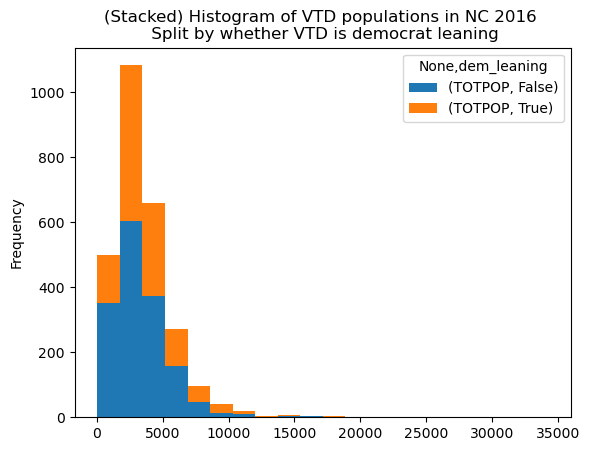

In [107]:
vtd['dem_leaning'] = vtd.EL16G_GV_D > vtd.EL16G_GV_R
vtd[["TOTPOP", "dem_leaning"]].pivot(columns = ["dem_leaning"], ).plot(kind = 'hist', 
                                                                       stacked = True,
                                                                       bins = 20, 
                                                                       title = "(Stacked) Histogram of VTD populations in NC 2016 \n Split by whether VTD is democrat leaning")

In [105]:
vtd[vtd.dem_leaning == True].TOTPOP.describe()

count     1125.000000
mean      3814.361778
std       2658.171159
min        191.000000
25%       2253.000000
50%       3192.000000
75%       4623.000000
max      34282.000000
Name: TOTPOP, dtype: float64

In [106]:
vtd[vtd.dem_leaning == False].TOTPOP.describe()

count     1567.000000
mean      3346.730057
std       2287.570552
min         37.000000
25%       1839.500000
50%       3018.000000
75%       4277.500000
max      33387.000000
Name: TOTPOP, dtype: float64

In [35]:
len(vtd)

2692

In [109]:
joined [joined.EL16G_GV_D > joined.EL16G_GV_R][["GEOID10", "VTD"]].groupby("VTD").agg('count').describe()

,GEOID10
count,1125.000000
mean,129.096889
std,82.519406
min,23.000000
25%,75.000000
50%,109.000000
75%,163.000000
max,1007.000000


In [110]:
joined [joined.EL16G_GV_D <= joined.EL16G_GV_R][["GEOID10", "VTD"]].groupby("VTD").agg('count').describe()

,GEOID10
count,1567.000000
mean,157.599872
std,89.881013
min,28.000000
25%,100.000000
50%,142.000000
75%,193.000000
max,1713.000000


## Properties of VTDs

## Properties of VTDs